<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Laboratorio04_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LABORATORIO 04**

Vamos a tomar la mejor semilla de 4 dígitos del algoritmo congruencial de cuadrados medios (Laboratorio 3) que es: 1781 y su periodo 126 y usarla para los nuevos algoritmos estudiados.

Para asegurarnos que los cáculos estén bien, es posible que la mejor semilla que reportaste no sea 1781 y su periodo no sea 126. Por ello, deberás encontrar tu error (si cometiste alguno) considerando la respuesta correcta dada.

Luego, vamos a programar los siguientes algoritmos:

- Algoritmo no congruencial de cuadrados medios.

- Algoritmo no congruencial de productos medios (tendrá a 1781 como semilla X1)

- Algoritmo no congruencial de multiplicador constante (tendrá a 1781 como multiplicador constante "a")

Luego, realizarás búsqueda exhaustiva de la mejor semilla (X0) para los 3 algoritmos realizando búsqueda exhaustiva a los valores entre 1000 y 9999 y almacenarás todas las longitudes para toda las semillas.

Finalmente, generarás un boxplot de los periodos de cada algoritmo.

Concluirás generando una tabla teniendo como filas los algoritmos, y como columnas el mínimo, promedio, máximo de los periodos.

**Librerias**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**Algoritmo no congruencial de cuadrados medios**

In [ ]:
def algoritmo_no_congruencial_cuadrados_medios(x0):
  digitos_semilla = len(str(x0))
  if digitos_semilla <= 3:
    return []
  numeros_aleatorios = []
  valores_vistos = set()
  while True:
    semilla_cuadrada = x0 ** 2
    cadena_cuadrada = str(semilla_cuadrada)

    if digitos_semilla %2==0 and len(cadena_cuadrada) % 2 != 0:
      cadena_cuadrada = "0" + cadena_cuadrada

    mid = len(cadena_cuadrada) // 2
    inicio = mid - (digitos_semilla // 2)
    fin = inicio + digitos_semilla
    digitos_centrales = cadena_cuadrada [inicio:fin]
    valorAleatorio = float("0." + digitos_centrales)

    if valorAleatorio in valores_vistos:
      break

    numeros_aleatorios.append(valorAleatorio)
    valores_vistos.add(valorAleatorio)
    x0 = int(digitos_centrales)

  return numeros_aleatorios

**Algoritmo no congruencial de productos medios (tendrá a 1781 como semilla X1)**

In [ ]:
def digitos_centrales(num, D):
    num_str = str(num).zfill(2 * D)
    start = (len(num_str) - D) // 2
    end = start + D
    return int(num_str[start:end])

In [ ]:
def algoritmo_no_congruencial_productos_medios(x0, x1, D):
    resultados = []
    while True:
        y = x0 * x1
        nuevo = digitos_centrales(y, D)
        r = nuevo / (10**D)

        if r in resultados:
            break

        resultados.append(r)
        x0, x1 = x1, nuevo
    return resultados

**Algoritmo no congruencial de multiplicador constante (tendrá a 1781 como multiplicador constante "a")**

In [ ]:
def digitos_centrales(num, D):
    s = str(num).zfill(2 * D)
    i = (len(s) - D) // 2
    return int(s[i:i + D])

In [ ]:
def algoritmo_no_congruencial_multiplicador_constante(x0, a, D):
    xi = x0
    resultados = []

    while True:
        yi = a * xi
        centro = digitos_centrales(yi, D)
        ri = centro / (10 ** D)
        xi = centro

        if ri in resultados:
            break
        resultados.append(ri)
    return resultados

**Búsqueda exhaustiva de la mejor semilla (X0) para los 3 algoritmos realizando búsqueda exhaustiva a los valores entre 1000 y 9999 y almacenarás todas las longitudes para toda las semillas.**

In [ ]:
periodos_cuadrados = []
mejor_periodo_cuadrados = 0
mejor_semilla_cuadrados = 0

for semilla in range(1000, 10000):
    periodo = len(algoritmo_no_congruencial_cuadrados_medios(semilla))
    periodos_cuadrados.append(periodo)
    if periodo > mejor_periodo_cuadrados:
        mejor_periodo_cuadrados = periodo
        mejor_semilla_cuadrados = semilla

periodos_multiplicador = []
mejor_periodo_multiplicador = 0
mejor_semilla_multiplicador = 0

a = 1781
D = 4

for semilla in range(1000, 10000):
    periodo = len(algoritmo_no_congruencial_multiplicador_constante(semilla, a, D))
    periodos_multiplicador.append(periodo)
    if periodo > mejor_periodo_multiplicador:
        mejor_periodo_multiplicador = periodo
        mejor_semilla_multiplicador = semilla


periodos_productos = []
mejor_periodo_productos = 0
mejor_semilla_productos = 0

otra_semilla = 1781
d = 4

for semilla in range(1000, 10000):
    periodo = len(algoritmo_no_congruencial_productos_medios(semilla, otra_semilla, d))
    periodos_productos.append(periodo)
    if periodo > mejor_periodo_productos:
        mejor_periodo_productos = periodo
        mejor_semilla_productos = semilla


print("La mejor semilla en Cuadrados Medios es:", mejor_semilla_cuadrados,
      "con periodo:", mejor_periodo_cuadrados)

print("La mejor semilla en Multiplicador Constante es:", mejor_semilla_multiplicador,
      "con periodo:", mejor_periodo_multiplicador)

print("La mejor semilla en Productos Medios es:", mejor_semilla_productos,
      "con periodo:", mejor_periodo_productos)

La mejor semilla en Cuadrados Medios es: 1781 con periodo: 126
La mejor semilla en Multiplicador Constante es: 1744 con periodo: 184
La mejor semilla en Productos Medios es: 4171 con periodo: 416


**Boxplot de los periodos de cada algoritmo.**

      Cuadrados Medios  Productos Medios  Multiplicador Constante
0                    1               296                       20
1                    4                81                      100
2                    5                48                      100
3                    5                79                       39
4                    6               117                      101
...                ...               ...                      ...
8995                 2               123                      108
8996                 6                88                      133
8997                 5                59                       91
8998                 4                84                       78
8999                 4               223                        6

[9000 rows x 3 columns]


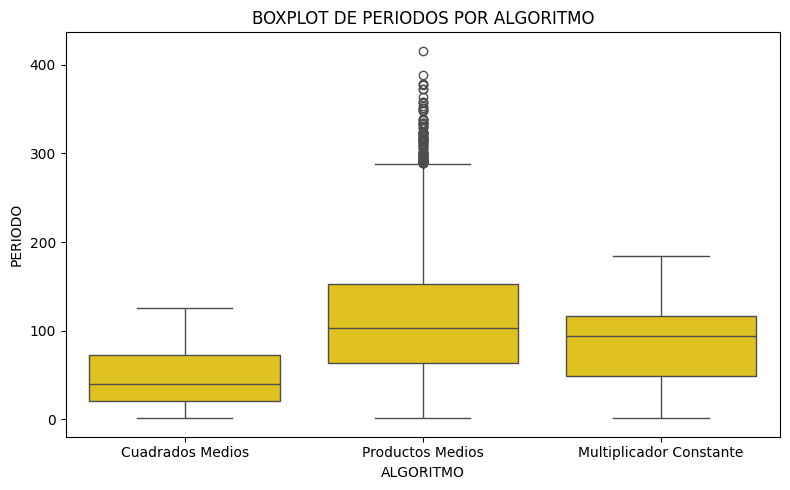


Estadísticas de periodos por algoritmo:

                         Mínimo    Promedio  Máximo
Cuadrados Medios            1.0   47.636000   126.0
Productos Medios            1.0  112.074778   416.0
Multiplicador Constante     1.0   88.235444   184.0


In [ ]:
df = pd.DataFrame({
    'Cuadrados Medios': periodos_cuadrados,
    'Productos Medios': periodos_productos,
    'Multiplicador Constante': periodos_multiplicador
})

print(df)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Algoritmo', y='Periodo', data=df.melt(var_name='Algoritmo', value_name='Periodo'), color="gold")
plt.title('BOXPLOT DE PERIODOS POR ALGORITMO')
plt.ylabel('PERIODO')
plt.xlabel('ALGORITMO')
plt.tight_layout()
plt.show()

estadisticas = df.describe().T[['min', 'mean', 'max']].rename(columns={
    "min": "Mínimo",
    "mean": "Promedio",
    "max": "Máximo",
})

print("")
print("Estadísticas de periodos por algoritmo:")
print("")
print(estadisticas)